# Методы обучения без учителя.
## Методы кластеризации

В этом задании вам необходимо будет применить 3 метода кластеризации к данным.

Для каждого метода будет свой вопрос, ответ на который надо будет передать на портал

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Подготовка данных

Для начала загрузим данные из этой [статьи](https://fivethirtyeight.com/features/weather-forecast-news-app-habits/)

In [2]:
df = pd.read_csv('./weather-check.csv')

In [3]:
df.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [81]:
df.shape

(928, 7)

Они представляют из сбея результат небольшого опроса жителей США на тему того, как они проверяют прогноз прогоды. Кроме того в опроснике есть пункты, связанные с соц-дем информацией: возраст, пол, заработок, регион. 

Все признаки, в данном случае, являются категориальными.

Для начала удалим столбец с идентификатором респондентов и столбец с открытым вопросом.

In [4]:
df = df.drop(labels=df.columns[0], axis=1)
df = df.drop(labels=df.columns[2], axis=1)

In [15]:
df.head()

,Do you typically check a daily weather report?,How do you typically check the weather?,"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,Yes,The default weather app on your phone,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,Yes,The default weather app on your phone,Very likely,18 - 29,Male,Prefer not to answer,-
2,Yes,The default weather app on your phone,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,Yes,The default weather app on your phone,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,Yes,A specific website or app (please provide the ...,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


Далее выполним перекодировку признаков с помощью метода `pd.get_dummies`. 

Конечно, для таких признаков как "заработок" или "регион проживания" можно выполнить более интеллектуальное преобразование (например учитывающее, что ответ "50,000 to  74,999" ближе к "80,000 to 99,999", чем к "150,000 to 174,999"), но для первого подхода мы этого делать не будем.

In [6]:
df_dummy = pd.get_dummies(df)

In [14]:
df_dummy.head()

,Do you typically check a daily weather report?_No,Do you typically check a daily weather report?_Yes,How do you typically check the weather?_-,How do you typically check the weather?_A specific website or app (please provide the answer),How do you typically check the weather?_Internet search,How do you typically check the weather?_Local TV News,How do you typically check the weather?_Newsletter,How do you typically check the weather?_Newspaper,How do you typically check the weather?_Radio weather,How do you typically check the weather?_The Weather Channel,...,US Region_-,US Region_East North Central,US Region_East South Central,US Region_Middle Atlantic,US Region_Mountain,US Region_New England,US Region_Pacific,US Region_South Atlantic,US Region_West North Central,US Region_West South Central
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
X = df_dummy.values

## Kmeans

Обычно, результаты kmeans на данных, полностью состоящим из категориальных признаков, получаются не такими хорошими.

* Обучите метод к-средних с `n_clusters` от 2 до 20 и `random_state=123`
* Создайте массив `scores`
* Для каждого запуска вычислите `silhouette_score` полученной кластеризации
* В переменную `answer1` сохраните значение наибольшего значения из `scores` c точностью до сотых

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### *РЕШЕНИЕ*

In [18]:
Ks = [i for i in range(2,21)]
scores = []

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    scores.append(score)
    
answer1 = round(max(scores), 2)

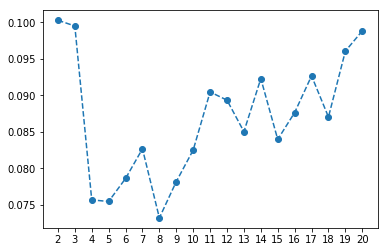

In [22]:
plt.plot(Ks, scores, '--o')
plt.xticks(Ks)
plt.show()

In [23]:
answer1

0.1

## Агломеративная кластеризация

Попробуем применить агломеративную кластеризацию

* Прогоните метод с параметрами `method='average'`, `metric='cosine'`
* Визуализируйте полученную дендрограмму
* Выделите 5 кластеров из полученной иерархии
* В переменную `answer2` запишите долю мужчин во втором по величине кластере с точностью до сотых

In [9]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage

### *РЕШЕНИЕ*

In [26]:
Z = linkage(X, method='average', metric='cosine')

In [33]:
ticks = [round(i* 0.05,2) for i in range(0,100)]

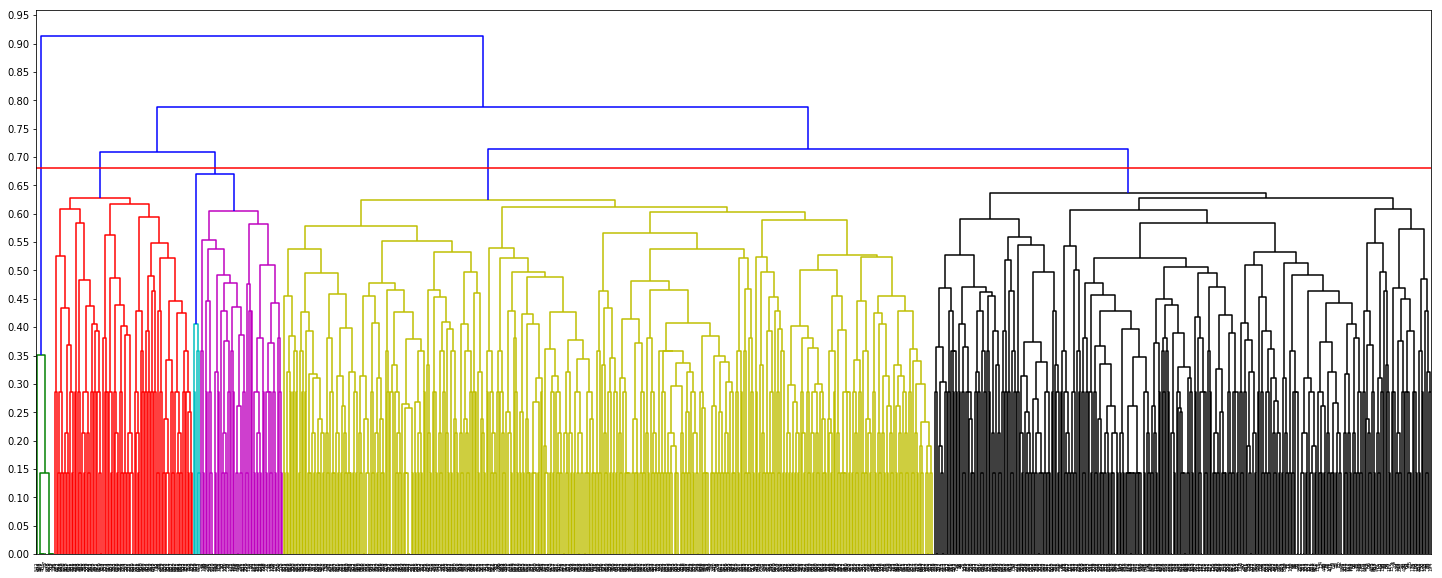

In [36]:
plt.figure(figsize=(25, 10))
plt.yticks(ticks)
dendrogram(Z)
plt.axhline(y=0.68, color='r', linestyle='-')
plt.show()

In [51]:
label = fcluster(Z, 0.68, criterion='distance')
df_dummy.loc[:, 'label'] = label

In [52]:
df_dummy.head()

,Do you typically check a daily weather report?_No,Do you typically check a daily weather report?_Yes,How do you typically check the weather?_-,How do you typically check the weather?_A specific website or app (please provide the answer),How do you typically check the weather?_Internet search,How do you typically check the weather?_Local TV News,How do you typically check the weather?_Newsletter,How do you typically check the weather?_Newspaper,How do you typically check the weather?_Radio weather,How do you typically check the weather?_The Weather Channel,...,US Region_East North Central,US Region_East South Central,US Region_Middle Atlantic,US Region_Mountain,US Region_New England,US Region_Pacific,US Region_South Atlantic,US Region_West North Central,US Region_West South Central,label
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,5
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,5


In [53]:
df_dummy.columns

Index(['Do you typically check a daily weather report?_No',
       'Do you typically check a daily weather report?_Yes',
       'How do you typically check the weather?_-',
       'How do you typically check the weather?_A specific website or app (please provide the answer)',
       'How do you typically check the weather?_Internet search',
       'How do you typically check the weather?_Local TV News',
       'How do you typically check the weather?_Newsletter',
       'How do you typically check the weather?_Newspaper',
       'How do you typically check the weather?_Radio weather',
       'How do you typically check the weather?_The Weather Channel',
       'How do you typically check the weather?_The default weather app on your phone',
       'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?_-',
       'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikel

In [61]:
for i, group in df_dummy.groupby('label'):
    print('=' * 10)
    print('cluster {}'.format(i))
    print(f'n= {group.shape[0]}')
    n_males = group['What is your gender?_Male'].sum()
    print(f"males = {n_males}")

cluster 1
n= 12
males = 0
cluster 2
n= 92
males = 4
cluster 3
n= 60
males = 60
cluster 4
n= 433
males = 12
cluster 5
n= 331
males = 313


In [62]:
answer2 = round(313/331, 2)

In [63]:
answer2 

0.95

## DBSCAN

Возможно вы уже успели заметить, что часть респондентов практически не отвечали на заданные вопросы - то есть в соответствующих графах стоит символ "-". "Молчунами" будем называть участников опроса, которые не ответили ни на один вопрос. Таких респондентов можно сразу исключить из дальнейших исследований.

* Переберите значение параметра `eps` в интервале [0.1, 1] с шагом 0.1
* Остальные параметрамы установите следующим образом `min_samples=20`, `metric='cosine'`
* В переменную `answer3` запишите значение `eps` (c точностью до **сотых**) при котором алгоритм выделит всех "молчунов" в отдельный кластер с выбросами

In [10]:
from sklearn.cluster import DBSCAN

### *РЕШЕНИЕ*

In [67]:
silent_answers = [name for name in df_dummy.columns if name.endswith('_-')]
silent_answers

['How do you typically check the weather?_-',
 'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?_-',
 'Age_-',
 'What is your gender?_-',
 'How much total combined money did all members of your HOUSEHOLD earn last year?_-',
 'US Region_-']

In [77]:
is_silent = (df_dummy[silent_answers[0]] == 1) & \
            (df_dummy[silent_answers[1]] == 1) & \
            (df_dummy[silent_answers[2]] == 1) & \
            (df_dummy[silent_answers[3]] == 1) & \
            (df_dummy[silent_answers[4]] == 1) & \
            (df_dummy[silent_answers[5]] == 1)

In [80]:
df_dummy[is_silent].shape[0]

11

In [84]:
epsilons = [round(i* 0.1,2) for i in range(1,11)] 
epsilons 

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [108]:
for eps in epsilons:
    dbscan = DBSCAN(eps=eps, min_samples=20, metric='cosine')
    dbscan.fit(X)
    labels = dbscan.labels_
    df_dummy.loc[:, 'label_dbscan'] = labels
    print(eps)
    print((df_dummy[is_silent]['label_dbscan'] == -1).all())
    print(pd.Series(labels).value_counts())



0.1
True
-1    928
dtype: int64
0.2
True
-1    928
dtype: int64
0.3
True
 0    849
-1     79
dtype: int64
0.4
True
 0    849
-1     79
dtype: int64
0.5
True
 0    916
-1     12
dtype: int64
0.6
False
0    928
dtype: int64
0.7
False
0    928
dtype: int64
0.8
False
0    928
dtype: int64
0.9
False
0    928
dtype: int64
1.0
False
0    928
dtype: int64


In [109]:
answer3 = 0.5

# Строка с ответами

In [110]:
print('kmeans {:.2f}\nagg {:.2f}\ndbscan {:.2f}'.format(answer1, answer2, answer3))

kmeans 0.10
agg 0.95
dbscan 0.50
